In [1]:
import numpy as np
import numpy.linalg as la
import random
%matplotlib inline
import matplotlib.pyplot as plt

# Summing Vectors

In [19]:
ls = np.random.randn(10**7)

In [20]:
%%timeit
np.sum(ls)

100 loops, best of 3: 5.54 ms per loop


In [21]:
ls = [random.random() for i in range(10**7)]

In [22]:
%%timeit
sum = 0
for x in ls:
    sum += x

1 loop, best of 3: 281 ms per loop


In [23]:
%%bash
./sum_time

3.020000ms


# Matrix Multiplication

In [26]:
n = 5000
A = np.random.randn(n**2).reshape((n,n))

In [27]:
%%timeit
B = A @ A

1 loop, best of 3: 3.01 s per loop


In [1]:
%%bash
g++ mat_mult.cpp -o matmult -O3 -larmadillo

In [2]:
%%bash
./matmult

2.770789 s


# RBF Interpolation

In [2]:
def rbf_interp(x, y, z, eps):
    A = np.abs(np.subtract.outer(x,x))*eps
    A = np.exp(-A**2)
    c = la.solve(A, y)
    A = np.abs(np.subtract.outer(z,x))*eps
    A = np.exp(-A**2)
    return A @ c

cond(A)=1.18983e+13


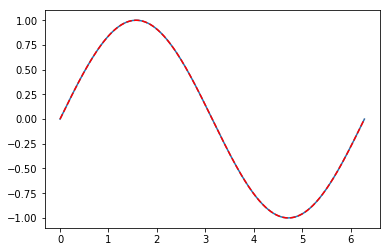

In [3]:
eps = 45
n = 1000
m = 10**5
a, b = 0, 2*np.pi

x = np.linspace(a, b, n)
z = np.linspace(a, b, m)
y = np.sin(x)

A = np.abs(np.subtract.outer(x,x))*eps
A = np.exp(-A**2)
print('cond(A)=%g' % la.cond(A))

u = rbf_interp(x,y,z,eps)

plt.plot(x, y)
plt.plot(z, u, 'r--')

In [4]:
%%timeit
u = rbf_interp(x,y,z,eps)

1 loop, best of 3: 3.13 s per loop


In [68]:
%%bash
g++ rbf_interp_test.cpp -o rbf_interp_test -O3 -larmadillo

In [5]:
%%bash
./rbf_interp_test

Best of 10 runs: 	0.416424s


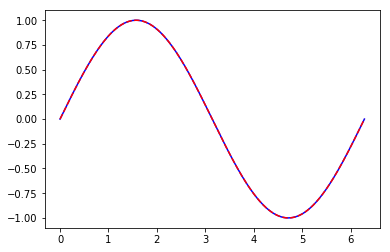

In [66]:
u = np.genfromtxt('u_sine.dat')
n = len(u)
z = np.linspace(0, 2*np.pi, n)
plt.plot(z, np.sin(z), 'b-')
plt.plot(z, u, 'r--')
plt.show()

In [6]:
%%bash
g++ rbf_interp_test.cpp -o rbf_interp_test -O3 -larmadillo -DARMA_DONT_USE_WRAPPER -lopenblas -llapack

In [7]:
%%bash
./rbf_interp_test

Best of 10 runs: 	0.415460s
